In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Read in the csv
csv_path_akc = "../Data/akc_breed_info.csv"
csv_path_show = "../Data/best_in_show_cleaned.csv"
csv_path_codes = "../Data/breed_codes.csv"
csv_path_intelligence = "../Data/dog_intelligence.csv"

In [59]:
df_akc = pd.read_csv(csv_path_akc)
df_show = pd.read_csv(csv_path_show, encoding='latin-1')
df_codes = pd.read_csv(csv_path_codes)
df_intelligence = pd.read_csv(csv_path_intelligence)

In [62]:
df_akc.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [10]:
df_show.drop(df_show.index[0], inplace=True)

In [61]:
df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.00,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.00,30,0.70,14,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.00,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.00,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.00,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [7]:
df_codes.head()

,CODE,BREED DESCRIPTION
0,AFF,AFFENPINSCHER
1,AKI,AKITA
2,MAL,ALASKAN MALAMUTE
3,AW,AMERICAN WIREHAIRD
4,ARG,ARGENTINE DOGO


In [8]:
df_intelligence.head()

,index,Breed,Classification,obey,reps_lower,reps_upper
0,0,Border Collie,Brightest Dogs,95%,1,4
1,1,Poodle,Brightest Dogs,95%,1,4
2,2,German Shepherd,Brightest Dogs,95%,1,4
3,3,Golden Retriever,Brightest Dogs,95%,1,4
4,4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [9]:
df_show.shape

(172, 55)

In [62]:
df_show.columns

Index(['dog_breed', 'category', 'datadog_score', 'popularity_in_us',
       'lifetime_cost_usd', 'intelligence_trainability_ranking',
       'intelligence_trainability_percent', 'longevity_years',
       'longevity_percent', 'num_genetic_ailments', 'genetic_ailments_percent',
       'avg_purchase_price_us', 'avg_purchase_price_us_percent',
       'food_costs_yearly_usd', 'food_costs_yearly_percent',
       'grooming_required', 'grooming_required_percent',
       'suitability_for_children_score', 'suitability_for_children_percent',
       'ultimate top_dog_mega_score_kids',
       'ultimate_top_data_dog_mega_ranking_no_kids',
       'ultimate_top_data_dog_mega_ranking_kids',
       'ultimate_top_dog_mega_score', 'popularity_rating', 'size_category',
       'weight_kg', 'weight_lbs', 'shoulder_height_cm', 'shoulder_height_in',
       'intelligence_category', 'repetitions_new_commands',
       'obey_first_command_percent', 'longevity_sample_size',
       'genetic_diseases_congenital', 'co

In [11]:
#df_show.drop('note', axis=1, inplace=True)

In [63]:
df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.00,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.00,30,0.70,14,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.00,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.00,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.00,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [13]:
#confirming all values are NaN before dropping column
is_nan_series = df_show['POPULARITY_IN_US'].isna()#.all()

# Print the result
print(is_nan_series)

0      False
1      False
2      False
3      False
4      False
       ...  
167    False
168    False
169    False
170    False
171    False
Name: POPULARITY_IN_US, Length: 172, dtype: bool


In [18]:
df_show.drop('POPULARITY IN US.1', axis=1, inplace=True)

In [49]:
df_show.rename(columns={'4a average purchase price, US$': 'avg_purchase_price_us'}, inplace=True)

In [107]:
df_show.to_csv('../Data/best_in_show_cleaned.csv', index=False)

In [82]:
# Count null values in the 'ColumnName' column
null_count = df_show['weight_kg'].isnull().sum()
null_count2 = df_show['weight_lbs'].isnull().sum()

print(f"Number of null values in 'kg': {null_count}")
print(f"Number of null values in 'lbs': {null_count2}")
# will drop first col as is redundant

Number of null values in 'kg': 2
Number of null values in 'lbs': 2


In [83]:
# Check null values in the 'weight_kg' column
null_mask = df_show['weight_kg'].isnull()

# Filter the DataFrame based on the null_mask
rows_with_null = df_show[null_mask]

# Display the DataFrame with rows where 'weight_kg' has null values
print("DataFrame with Null Values in 'weight_kg':")
print(rows_with_null)

DataFrame with Null Values in 'weight_kg':
                                dog_breed category  datadog_score  \
133                      Looked - nothing      NaN            NaN   
143  NOT POSSIBLE IF NO INTELLIGENCE DATA      NaN            NaN   

     POPULARITY_IN_US lifetime_cost_usd intelligence_trainability_ranking  \
133               NaN               NaN                               NaN   
143               NaN               NaN                               NaN   

    Intelligence_trainability_percent longevity_years longevity_percent  \
133                               NaN             NaN               NaN   
143                               NaN             NaN               NaN   

    num_genetic_ailments  ... food_yearly_usd food_lifetime_usd  \
133                  NaN  ...             NaN               NaN   
143                  NaN  ...             NaN               NaN   

    other_costs_total_usd total_yearly_usd total_yearly_gbp  \
133                   NaN 

In [84]:
rows_with_null

,dog_breed,category,datadog_score,POPULARITY_IN_US,lifetime_cost_usd,intelligence_trainability_ranking,Intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
133,Looked - nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NOT POSSIBLE IF NO INTELLIGENCE DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Use .loc to filter rows by index
indices_to_filter = [133]
rows = df_show.loc[indices_to_filter]

In [100]:
rows

,dog_breed,category,datadog_score,POPULARITY_IN_US,lifetime_cost_usd,intelligence_trainability_ranking,Intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
133,Looked - nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Make all column lowercase
df_show.columns = df_show.columns.str.lower()

df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.00,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.00,30,0.70,14,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.00,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.00,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.00,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [64]:
#Check what datatypes are we dealing with
df_show.dtypes

dog_breed                                      object
category                                       object
datadog_score                                 float64
popularity_in_us                                int64
lifetime_cost_usd                              object
intelligence_trainability_ranking              object
intelligence_trainability_percent             float64
longevity_years                                object
longevity_percent                             float64
num_genetic_ailments                           object
genetic_ailments_percent                      float64
avg_purchase_price_us                          object
avg_purchase_price_us_percent                 float64
food_costs_yearly_usd                         float64
food_costs_yearly_percent                     float64
grooming_required                              object
grooming_required_percent                     float64
suitability_for_children_score                 object
suitability_for_children_per

In [16]:
# How many vars and observations do we have
print(df_show.shape)

(172, 55)


In [69]:
pd.set_option('display.precision', 2)

In [70]:
# get descriptive statistics on the lifetime costs for different breeds
df_show['lifetime_cost_usd'].describe()

count       94.00
mean     20184.79
std       5169.64
min      12653.00
25%      17778.75
50%      20054.50
75%      21872.00
max      59792.00
Name: lifetime_cost_usd, dtype: float64

In [67]:
df_show['lifetime_cost_usd'] = pd.to_numeric(df_show['lifetime_cost_usd'], errors='coerce').astype(float)

In [121]:
#Save Dataframe working copy
df_show.to_csv('../Data/best_in_show_cleaned.csv', index=False)

From the above I can see I have data cleaning to perform

In [71]:
sorted(list(df_show.columns))

['avg_food_weekly_â£',
 'avg_purchase_price_us',
 'avg_purchase_price_us_percent',
 'avg_purchase_price_usd',
 'category',
 'congenital_ailments_areas_affected',
 'datadog_score',
 'dog_breed',
 'food_costs_yearly_percent',
 'food_costs_yearly_usd',
 'food_lifetime_usd',
 'food_weekly_usd',
 'food_yearly_usd',
 'genetic_ailments_percent',
 'genetic_diseases_congenital',
 'grooming_required',
 'grooming_required_percent',
 'grooming_yearly_gbp',
 'highest_usd',
 'intelligence_category',
 'intelligence_trainability_percent',
 'intelligence_trainability_ranking',
 'lifetime_cost_percent',
 'lifetime_cost_usd',
 'lifetime_cost_usd.1',
 'longevity_percent',
 'longevity_sample_size',
 'longevity_years',
 'lowest_usd',
 'max_gpb',
 'min_gpb',
 'num_genetic_ailments',
 'obey_first_command_percent',
 'other_costs_total_usd',
 'pet_sitters_yearly_gbp',
 'popularity_in_us',
 'popularity_rating',
 'price_category',
 'repetitions_new_commands',
 'shoulder_height_cm',
 'shoulder_height_in',
 'size_c

In [26]:
# Make all column names lowercase
df_show.columns = df_show.columns.str.lower()

### Handling Null Values

In [120]:
# find missing data
total = df_show.isnull().sum().sort_values(ascending=False)
percentNulls = (df_show.isnull().sum()/df_show.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentNulls], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
lifetime_cost_percent,85,0.49
food_yearly_usd,85,0.49
ultimate_top_dog_mega_score,85,0.49
ultimate_top_data_dog_mega_ranking_kids,85,0.49
ultimate_top_data_dog_mega_ranking_no_kids,85,0.49
ultimate top_dog_mega_score_kids,85,0.49
suitability_for_children_percent,85,0.49
grooming_required_percent,85,0.49
food_costs_yearly_percent,85,0.49
food_costs_yearly_usd,85,0.49


In [34]:
# View the 'max_gpb' column as a Series
max_gpb = df_show['max_gpb']

# Display the Series
print(max_gpb)

0            4
1            4
2          7.5
3            4
4            4
        ...   
167        7.5
168          4
169    no data
170    no data
171    no data
Name: max_gpb, Length: 172, dtype: object


<Axes: xlabel='lifetime_cost_usd', ylabel='Count'>

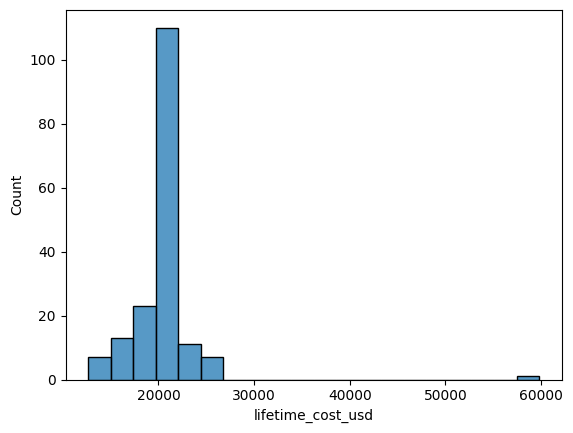

In [80]:
sns.histplot(data=df_show['lifetime_cost_usd'],bins=20)

### Dealing with NULL Values

In [73]:
df_show['lifetime_cost_usd'].describe()

count       94.00
mean     20184.79
std       5169.64
min      12653.00
25%      17778.75
50%      20054.50
75%      21872.00
max      59792.00
Name: lifetime_cost_usd, dtype: float64

As per above descriptive statistics, the median (aka 50th percentile) is 20054.50

In [75]:
# Replace with NaN
df_show['lifetime_cost_usd'].replace('no data', pd.NA, inplace=True)

In [77]:
# Replace NaN with median
df_show['lifetime_cost_usd'].fillna(20054.50, inplace=True)

In [86]:
df_show['longevity_years'].describe()

count    136.00
mean      10.96
std        1.99
min        6.29
25%        9.71
50%       11.28
75%       12.34
max       16.50
Name: longevity_years, dtype: float64

In [85]:
df_show['longevity_years'] = pd.to_numeric(df_show['longevity_years'], errors='coerce')

<Axes: xlabel='longevity_years', ylabel='Count'>

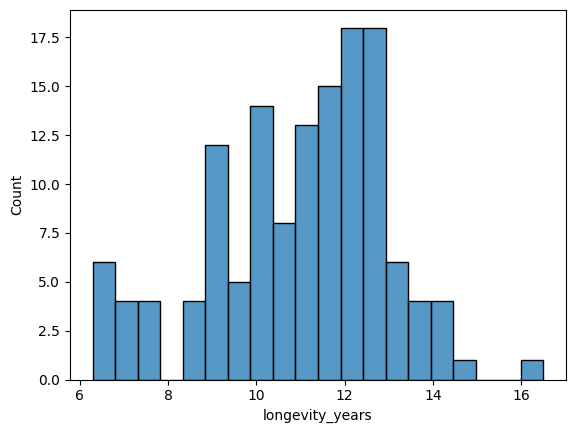

In [94]:
sns.histplot(data=df_show['longevity_years'],bins=20)

In [92]:
#data from AKC website
df_show.loc[df_show['dog_breed'] == 'Black Russian Terrier', 'longevity_years'] = 11.00

In [96]:
average_life_expectancy = df_show['longevity_years'].mean()

In [97]:
print(average_life_expectancy)

10.957372262773722


Instead of using mean of all dogs. I will group the dogs by size and calculate the means by size to fill in the missing data.

In [99]:
# group the dataframe by size & calculate avg for each group
mean_longevity_by_size = df_show.groupby('size_category')['longevity_years'].mean()

# Print the mean longevity for each size category
print(mean_longevity_by_size)

size_category
large      9.73
medium    11.13
small     11.84
Name: longevity_years, dtype: float64


Using a function, pass in argument 'record' that returns mean according to the above calculation, and applies to longevity_years column

In [108]:
def fillna_longevity(record):
    if record['longevity_years'] == 'no data':
        if record['size_category'] == 'small':
            return 11.84
        elif record['size_category'] == 'medium':
            return 11.13
        elif record['size_category'] == 'large':
            return 9.73
        else:
            return record['longevity_years']
    else:
        return record['longevity_years']

df_show['longevity_years'] = df_show.apply(fillna_longevity, axis=1)

In [106]:
# Replace no data with NaN
df_show['longevity_years'].replace('no data', pd.NA, inplace=True)

In [110]:
size_category_mapping = {'small': 11.84, 'medium': 11.13, 'large': 9.73}

# Iterate over rows and update 'longevity_years'
for _, row in df_show.iterrows():
    if pd.isna(row['longevity_years']):
        df_show.at[_, 'longevity_years'] = size_category_mapping.get(row['size_category'], row['longevity_years'])

In [113]:
df_show['longevity_years'].isna().all()

False

Recreate histogram with filled data

<Axes: xlabel='longevity_years', ylabel='Count'>

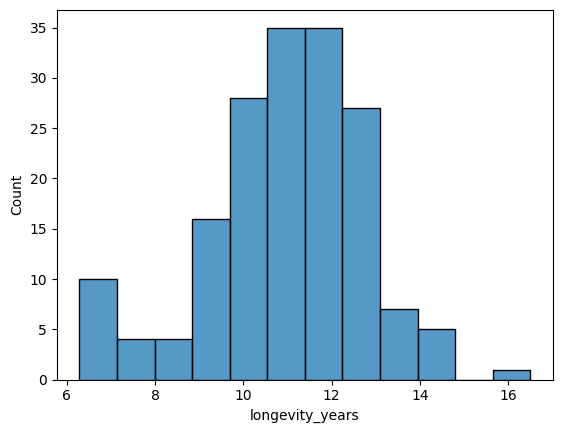

In [117]:
sns.histplot(data=df_show['longevity_years'],bins=12)

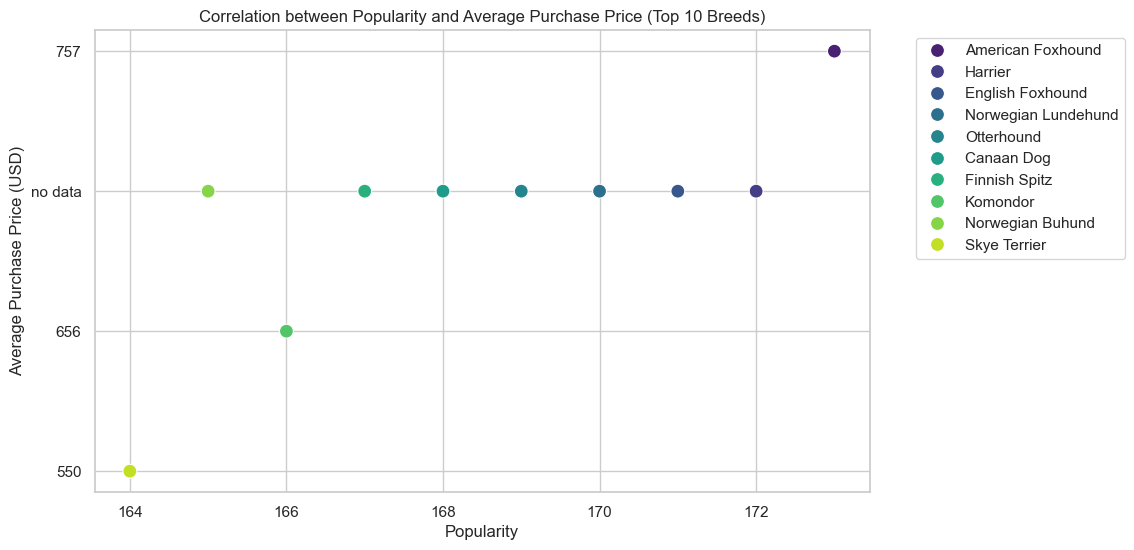

In [126]:
sns.set(style="whitegrid")

# select the top 10 breeds
top_10_breeds = df_show.sort_values(by='popularity_in_us', ascending=False).head(10)

# top 10 breeds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_in_us', y='avg_purchase_price_usd', data=top_10_breeds, hue='dog_breed', palette='viridis', s=100)

plt.title('Correlation between Popularity and Average Purchase Price (Top 10 Breeds)')
plt.xlabel('Popularity')
plt.ylabel('Average Purchase Price (USD)')

#  adjusted position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.show()

In [ ]:
#R: fix nulls of average purchase price 'no data' or exclude them from scatterplot
